<a href="https://colab.research.google.com/github/AnVo01/AI/blob/AI/Robot_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

def sind(x):
    return math.sin(math.radians(x))
 
def cosd(x):
    return math.cos(math.radians(x))

Px=[]
Py=[]
tt1=[]
tt2=[]
for i in range(-180,180,1):
  for j in range(-90,90,1):
    Px.append(50*cosd(i) + 40*cosd(i+j))
    Py.append(50*sind(i) + 40*sind(i+j))
    tt1.append(math.radians(i))
    tt2.append(math.radians(j))

data = pd.DataFrame(np.c_[tt1,tt2,Px,Py],columns=['tt1','tt2','Px','Py'])
y = data.drop(['Px','Py'],axis=1)
x = data.drop(['tt1','tt2'],axis=1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(2,)))
model.add(Dense(256,activation='relu'))
model.add(Dense(2))

model.compile(loss='mse',optimizer='Adam',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
365/365 [==============================] - 3s 6ms/step - loss: 1.4394 - accuracy: 0.7483 - val_loss: 1.1517 - val_accuracy: 0.7412
Epoch 2/10
365/365 [==============================] - 2s 6ms/step - loss: 1.1354 - accuracy: 0.7580 - val_loss: 1.2591 - val_accuracy: 0.7494
Epoch 3/10
365/365 [==============================] - 2s 6ms/step - loss: 1.1013 - accuracy: 0.7595 - val_loss: 1.0660 - val_accuracy: 0.7589
Epoch 4/10
365/365 [==============================] - 2s 5ms/step - loss: 1.0869 - accuracy: 0.7602 - val_loss: 1.1001 - val_accuracy: 0.7610
Epoch 5/10
365/365 [==============================] - 2s 6ms/step - loss: 1.0722 - accuracy: 0.7621 - val_loss: 1.0513 - val_accuracy: 0.7612
Epoch 6/10
365/365 [==============================] - 2s 5ms/step - loss: 1.0597 - accuracy: 0.7634 - val_loss: 1.0529 - val_accuracy: 0.7629
Epoch 7/10
365/365 [==============================] - 2s 6ms/step - loss: 1.0515 - accuracy: 0.7636 - val_loss: 1.0592 - val_accuracy: 0.7628
Epoch 

In [17]:
data

,tt1,tt2,Px,Py
0,-3.141593,-1.570796,-50.000000,40.000000
1,-3.141593,-1.553343,-50.698096,39.993908
2,-3.141593,-1.535890,-51.395980,39.975633
3,-3.141593,-1.518436,-52.093438,39.945181
4,-3.141593,-1.500983,-52.790259,39.902562
...,...,...,...,...
64795,3.124139,1.483530,-54.173523,-38.908255
64796,3.124139,1.500983,-53.478614,-38.975168
64797,3.124139,1.518436,-52.782644,-39.029942
64798,3.124139,1.535890,-52.085823,-39.072561


In [18]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               1536      
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dense_26 (Dense)            (None, 2)                 514       
                                                                 
Total params: 133,378
Trainable params: 133,378
Non-trainable params: 0
_________________________________________________________________


In [19]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  1.0654765367507935
độ chính xác kiểm tra là:  0.7734568119049072


In [20]:
model.predict(x_test)

array([[-0.6334344 , -0.06582914],
       [-0.8418598 , -0.00246134],
       [ 1.7457814 ,  0.15748295],
       ...,
       [-0.03868834, -0.03960766],
       [ 1.2798252 ,  0.10387373],
       [ 2.131726  ,  0.11529595]], dtype=float32)

In [21]:
y_test

,tt1,tt2
26554,-0.575959,0.069813
17616,-1.448623,1.151917
44016,1.117011,0.104720
23114,-0.907571,-0.279253
18137,-1.396263,0.820305
...,...,...
16862,-1.518436,0.558505
20999,-1.117011,0.506145
27683,-0.471239,0.925025
40415,0.767945,0.087266


In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [23]:
model.save('/content/gdrive/MyDrive/AI/Robot_2.h5')

In [24]:
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/AI/Robot_2.h5')

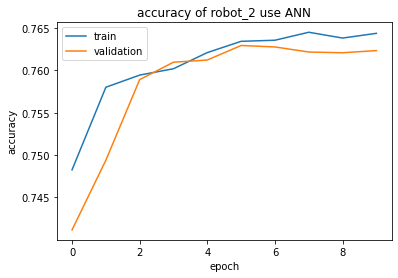

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of robot_2 use ANN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()